# Khai báo các thư viện cần thiết cho bài toán


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree  import DecisionTreeRegressor

# Scoring
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Mô tả bộ dữ liệu


In [2]:
# Đọc dữ liệu từ file .csv
df = pd.read_csv('./dataset/old-car-data.csv')

In [3]:
df.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5417,5417,Renault Duster 110PS Diesel RxZ,Kolkata,2013,57000,Diesel,Manual,First,19.01 kmpl,1461 CC,108.45 bhp,5.0,NaN,4.99
124,124,Tata Nano XTA,Coimbatore,2017,32684,Petrol,Automatic,First,21.9 kmpl,624 CC,37.48 bhp,4.0,NaN,3.23
867,867,Toyota Fortuner 3.0 Diesel,Mumbai,2010,41650,Diesel,Manual,Second,11.5 kmpl,2982 CC,171 bhp,7.0,NaN,10.99
491,491,Hyundai Creta 1.6 CRDi AT SX Plus,Bangalore,2016,32000,Diesel,Automatic,First,17.01 kmpl,1582 CC,126.2 bhp,5.0,NaN,15.50
4167,4167,Maruti Celerio VXI,Kochi,2017,3923,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,NaN,5.20


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
# Hiển thị thông tin về % số lượng dữ liệu khuyết thiếu

# Tính % dữ liệu khuyết thiếu
miss_percent = (df.isnull().sum() / len(df)) * 100 

# Tạo bảng hiển thị thông tin về % số lượng dữ liệu khuyết thiếu
missing = pd.DataFrame({"percent":miss_percent, 'count':df.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


# Tiền xử lý dữ liệu


In [8]:
# Bỏ cột số thứ tự (cột không tên đầu tiên trong file data)
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
# Lấy ra tên xe và tạo thành cột "Brand" từ chữ đầu tiên trong cột "Name"
df['Brand'] = df['Name'].apply(lambda x: str(x).split(" ")[0])

In [10]:
# Chuyển năm sản xuất xe thành tuổi đời của xe
import datetime
now = datetime.datetime.now()
df['Updated_Year'] = df['Year'].apply(lambda x : now.year - x)

In [11]:
# Loại bỏ đơn vị đo lường ở các cột "Mileage", "Engine", "Power" và "New_Price"
df['Updated_Mileage'] = df['Mileage'].apply(lambda x: str(x).split()[0])
df['Updated_Engine'] = df['Engine'].apply(lambda x: str(x).split()[0])
df['Updated_Power'] = df['Power'].apply(lambda x: str(x).split()[0])
df['Updated_Price'] = df['New_Price'].apply(lambda x: str(x).split()[0])

In [12]:
# Chuyển các cột vừa update về đơn vị 'float'
df['Updated_Mileage'] = pd.to_numeric(df['Updated_Mileage'], errors='coerce')
df['Updated_Engine'] = pd.to_numeric(df['Updated_Engine'], errors='coerce')
df['Updated_Power'] = pd.to_numeric(df['Updated_Power'], errors='coerce')
df['Updated_Price'] = pd.to_numeric(df['Updated_Price'], errors='coerce')

In [13]:
# Loại bỏ các cột cũ
df.drop(columns=['Name', 'Mileage', 'Engine', 'Power', 'New_Price', 'Year'], inplace=True)

In [14]:
# Tạo phương thức thay dữ liệu khuyết thiếu của cột bất kỳ dựa theo theo hãng "Brand", sử dũng mốt (dữ liệu xuất hiện nhiều nhất)
def replaceMissingData(data, col): 
    data[col] = data[col].fillna(0)
    # Lấy ra tên của tất cả các hãng có dữ liệu bị khuyết thiếu ở một cột bất kỳ
    total_brands = data.loc[(data[col].isnull()) | (data[col] == 0.0) | (data[col] == 'null')]['Brand'].unique();
    for brand in total_brands:
        # Lấy mốt của một cột bất kỳ từ các bản ghi dữ liệu có cùng hãng
        modeData = data.loc[data['Brand'] == brand][col].mode()
        if modeData.size > 0:
            replaced = modeData[0]
            # Lấy ra các bản ghi dữ liệu có cùng hãng mà bị khuyết thiếu dữ liệu ở cột đang xét
            rows = ((data['Brand'] == brand) & ((data[col].isnull()) | (data[col] == 0.0) | (data[col] == 'null')))
            # Tiến hành thay thế dữ liệu khuyết thiếu
            data.loc[rows, col] = replaced

In [15]:
# Thay thế dữ liệu khuyết thiếu cho các cột "Seats", "Updated_Mileage", "Updated_Engine" và "Updated_Power" (trừ cột "Updated_Price" vì khuyết thiếu một lượng lớn dữ liệu ~86%)
replaceMissingData(df, 'Seats')
replaceMissingData(df, 'Updated_Mileage')
replaceMissingData(df, 'Updated_Engine')
replaceMissingData(df, 'Updated_Power')

In [16]:
df.sample(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Updated_Year,Updated_Mileage,Updated_Engine,Updated_Power,Updated_Price
383,Kochi,41380,Petrol,Automatic,Second,5.0,11.77,Mercedes-Benz,9,14.80,1595.0,120.7,NaN
858,Chennai,23000,Diesel,Manual,First,7.0,6.90,Honda,9,24.50,1498.0,98.6,NaN
1033,Coimbatore,14656,Diesel,Manual,First,5.0,6.99,Hyundai,7,24.40,1120.0,71.0,NaN
3942,Jaipur,53500,Petrol,Manual,Second,4.0,0.63,Maruti,21,16.10,796.0,37.0,NaN
3519,Bangalore,30000,Petrol,Manual,Second,5.0,5.25,Volkswagen,9,16.47,1198.0,74.0,NaN


In [17]:
# Kiểm tra lại thông tin về % số lượng dữ liệu khuyết thiếu sau khi thực hiện thay thế dữ liệu khuyết thiếu
miss_percent = (df.isnull().sum() / len(df)) * 100 
missing = pd.DataFrame({"percent":miss_percent, 'count':df.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
Updated_Price,86.310018,5195


In [18]:
# Xử lý dữ liệu ngoại lai (outlier) cho các cột "Kilometers_Driven", "Seats", "Updated_Mileage", "Updated_Engine" và "Updated_Power"
from scipy import stats
z_score = 3;
threshold = (
    (np.abs(stats.zscore(df['Kilometers_Driven'])) < z_score) &
    (np.abs(stats.zscore(df['Seats'])) < z_score) &
    (np.abs(stats.zscore(df['Updated_Mileage'])) < z_score) &
    (np.abs(stats.zscore(df['Updated_Engine'])) < z_score) &
    (np.abs(stats.zscore(df['Updated_Power'])) < z_score)
)
df = df[threshold]

In [19]:
# Tạo biến dummies với các cột "Location", "Brand" và "Fuel_Type"

#Location
df_location = df[['Location']]
df_location = pd.get_dummies(df_location, drop_first=True)

#Brand
df_brand = df[['Brand']]
df_brand = pd.get_dummies(df_brand, drop_first=True)

#Fuel_Type
df_fuel = df[['Fuel_Type']]
df_fuel = pd.get_dummies(df_fuel, drop_first=True)

In [20]:
# Gán nhãn (label) cho các cột "Transmission" và "Owner_Type"

#Transmission
df.replace({"Manual": 0, "Automatic": 1}, inplace=True)

#Owner_Type
df.replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace=True)

In [21]:
# Gộp set lại sau khi đã xử lý dữ liệu và loại bỏ các cột cũ trước khi xử lý dữ liệu
train_set = pd.concat([df, df_location, df_fuel, df_brand], axis=1)
train_set.drop(["Location", "Fuel_Type", "Brand", "Updated_Price"], axis=1, inplace=True) # Không gộp cột "Updated_Price" (tương ứng với "New_Price") vì khuyết thiếu quá nhiều dữ liệu
train_set.head()

,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,Updated_Year,Updated_Mileage,Updated_Engine,Updated_Power,Location_Bangalore,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,72000,0,1,5.0,1.75,13,26.60,998.0,58.16,0,...,0,0,0,0,0,0,0,0,0,0
1,41000,0,1,5.0,12.50,8,19.67,1582.0,126.20,0,...,0,0,0,0,0,0,0,0,0,0
2,46000,0,1,5.0,4.50,12,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,0,0
3,87000,0,1,7.0,6.00,11,20.77,1248.0,88.76,0,...,0,0,0,0,0,0,0,0,0,0
4,40670,1,2,5.0,17.74,10,15.20,1968.0,140.80,0,...,0,0,0,0,0,0,0,0,0,0


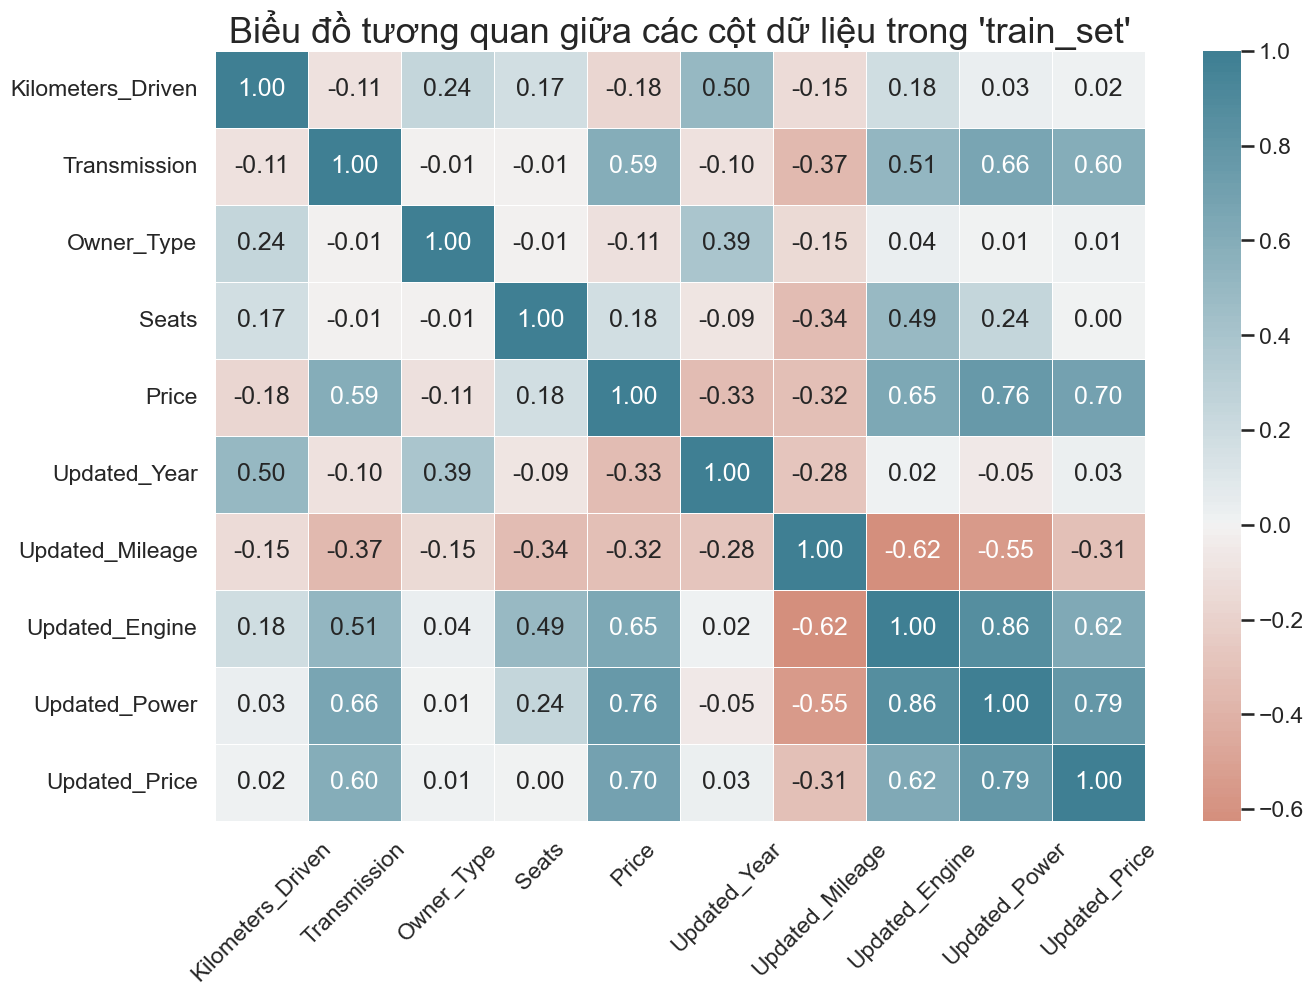

In [22]:
# Xây dựng biểu đồ tương quan (Heatmap) giữa các cột dữ liệu của dataset được sử dụng để huấn luyện
style.use('ggplot')
sns.set_style('whitegrid')
sns.set_context('talk')
plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(numeric_only=True), cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt=".2f", linewidths=.5, center = 0)
plt.title("Biểu đồ tương quan giữa các cột dữ liệu trong 'train_set'", fontsize = 26)
plt.xticks(rotation=45);

# Chia bộ dữ liệu và bắt đầu quá trình xử lý

In [23]:
# Chia 'train_set' thành 2 tập X và y dựa trên biến phụ thuộc "Price"
X = train_set.drop(columns=['Price'], axis=1)
y = train_set.loc[:,['Price']]

In [24]:
# Chuẩn hóa dữ liệu thông qua MinMaxScaler để tăng độ hiệu quả của mô hình học máy
from sklearn.preprocessing import MinMaxScaler
X[['Kilometers_Driven', 'Updated_Mileage', 'Updated_Power', 'Updated_Engine']] = MinMaxScaler().fit_transform(X[['Kilometers_Driven', 'Updated_Mileage', 'Updated_Power', 'Updated_Engine']])

In [25]:
# Chia train/test theo tỉ lệ 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Thực hiện tìm giá trị 'k' phù hợp cho thuật toán K-Nearest Neighbour

In [26]:
L=[];
Error=[];

for i in range(3,15,2):
    M = [];
    knn = KNeighborsRegressor(n_neighbors = i)
    knn_reg = knn.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    M.append(i)
    M.append(rmse)
    L.append(M)
    Error.append(mse)

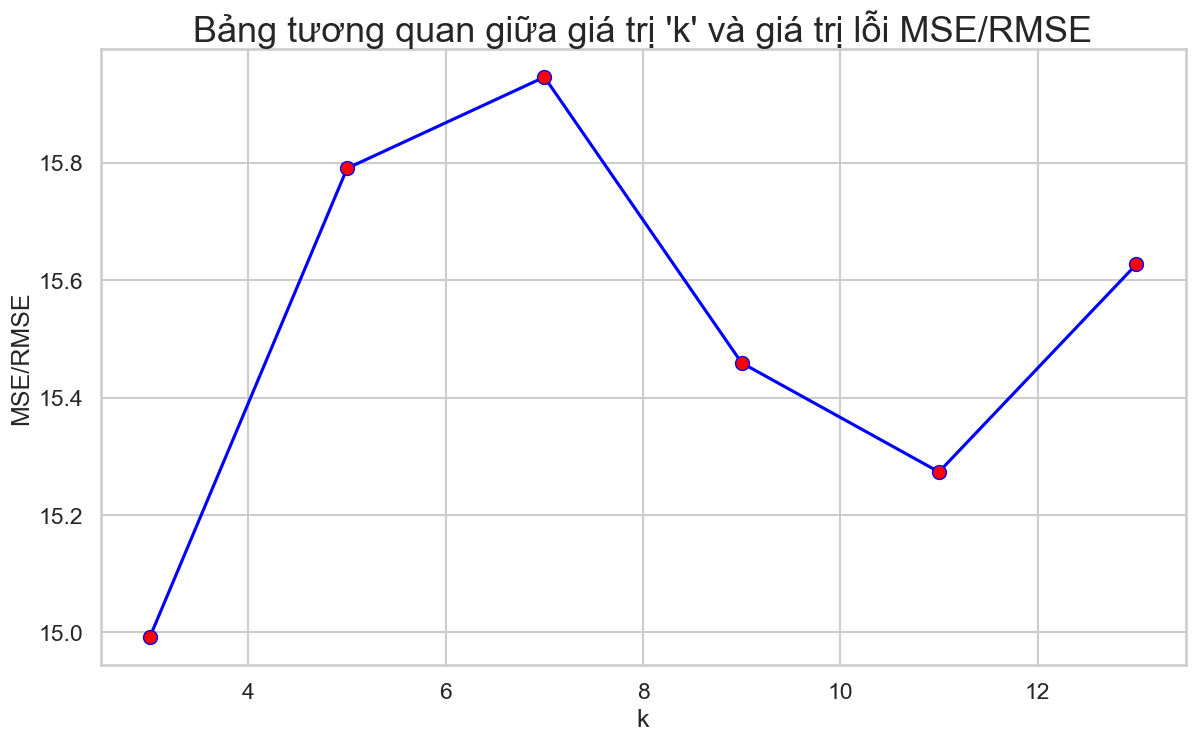

In [27]:
plt.figure(figsize=(14,8))
plt.plot(range(3,15,2), Error, color = 'blue', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Bảng tương quan giữa giá trị 'k' và giá trị lỗi MSE/RMSE", fontsize = 26)
plt.xlabel('k')
plt.ylabel('MSE/RMSE');

In [28]:
min = L[0];
for i in range(len(L)):
    if L[i][1] < min[1]:
        min = L[i];
k = min[0];
print(f"Giá trị 'k' thích hợp nhất (để mô hình có hiệu suất cao nhất) là {k}");

Giá trị 'k' thích hợp nhất (để mô hình có hiệu suất cao nhất) là 3


Khởi tạo các mô hình và tiến hành xử lý dữ liệu

In [29]:
# Khởi tạo các mô hình: Linear Regression, K-Nearest Neighbour, Random Forest Regressor và Decision Tree Regressor
models = {
    'Linear Regression': LinearRegression(),
    'K Nearest Neighbor': KNeighborsRegressor(n_neighbors = k),
    'Random Forest Regressor': RandomForestRegressor(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [30]:
# Tạo phương thức để khởi chạy từng model và đưa ra thông số đánh giá mô hình
def modelTraining(models, X_train, X_test, y_train, y_test):
    # Tạo biến 'model_scores' chứa các điểm số để phục vụ visualization
    model_scores = {}

    # Thực hiện train, test mô hình và đưa ra score
    for name, model in models.items():
        md = model
        reg = md.fit(X_train, y_train.values.ravel())
        y_pred = reg.predict(X_test)
        score = r2_score(y_pred, y_test)
        model_scores[name] = score

        # In thông số đánh giá mô hình
        print(name)
        print('+ Train accuracy: ', md.score(X_train, y_train))
        print('+ Test accuracy: ', md.score(X_test, y_test))
        print('+ Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
        print('+ Mean Squared  Error: ', mean_squared_error(y_test, y_pred))
        print('+ Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        print('+ R Squared Error: ', score, "\n")

    return model_scores

In [31]:
# Hiển thị dataset cùng với giá xe cũ đã được mô hình dự đoán
def displayPredictions(models, X_test, y_test, model_scores):
    for name, model in models.items():
        # Thực hiện train, test mô hình
        md = model
        y_pred = md.predict(X_test)

        # Gộp X_test với y_pred tạo thành một DataFrame với mục đích hiển thị dataset dưới dạng bảng
        results_df = X_test.copy()
        results_df['Predicted Price'] = y_pred
        pd.set_option('display.max_rows', None)
        
        # In ra 10 hàng đầu tiên của dataset
        print(name)
        print("+ Dataset cùng với giá xe cũ sau khi được mô hình dự đoán là:")
        display(results_df.head(10))

In [32]:
model_scores = modelTraining(models, X_train, X_test, y_train, y_test)

Linear Regression
+ Train accuracy:  0.7804094224667879
+ Test accuracy:  0.7898564354298421
+ Mean Absolute Error:  2.665988482181562
+ Mean Squared  Error:  19.79235138563856
+ Root Mean Squared Error:  4.4488595601163405
+ R Squared Error:  0.7624702398660168 

K Nearest Neighbor
+ Train accuracy:  0.9084477493948989
+ Test accuracy:  0.8408233048191671
+ Mean Absolute Error:  1.930157631680123
+ Mean Squared  Error:  14.992041701909523
+ Root Mean Squared Error:  3.8719557980314705
+ R Squared Error:  0.8109685319871721 

Random Forest Regressor
+ Train accuracy:  0.9856383952400423
+ Test accuracy:  0.9277869882968695
+ Mean Absolute Error:  1.3210171559015764
+ Mean Squared  Error:  6.8013755508864016
+ Root Mean Squared Error:  2.607944698586686
+ R Squared Error:  0.9250246632733339 

Decision Tree Regressor
+ Train accuracy:  0.9999970404418355
+ Test accuracy:  0.8653726783820495
+ Mean Absolute Error:  1.7979152249134949
+ Mean Squared  Error:  12.679861317762398
+ Root Mean

In [33]:
displayPredictions(models, X_test, y_test, model_scores)

Linear Regression
+ Dataset cùng với giá xe cũ sau khi được mô hình dự đoán là:


,Kilometers_Driven,Transmission,Owner_Type,Seats,Updated_Year,Updated_Mileage,Updated_Engine,Updated_Power,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Predicted Price
2422,0.039452,1,1,4.0,7,0.103324,0.933824,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,40.073714
1023,0.222890,0,1,5.0,9,0.664870,0.423274,0.331822,1,0,...,0,0,0,0,0,0,0,0,0,6.556494
1067,0.096151,0,1,5.0,10,0.480683,0.359655,0.302326,0,0,...,0,0,0,0,0,0,0,0,0,2.507628
231,0.202255,0,2,5.0,7,0.467206,0.360294,0.283155,0,0,...,0,0,0,0,0,0,0,0,0,3.768340
1551,0.166191,0,1,5.0,12,0.371518,0.359974,0.272462,0,0,...,0,0,0,0,0,0,0,1,0,-0.741551
177,0.096151,0,1,5.0,9,0.644205,0.423274,0.327139,1,0,...,0,0,0,0,0,0,0,0,0,7.821499
4593,0.306271,0,1,5.0,16,0.238095,0.552110,0.479298,0,0,...,0,0,0,0,0,0,0,0,0,2.856986
3604,0.199544,1,2,5.0,11,0.314465,0.606138,0.519117,0,0,...,0,0,0,0,0,0,0,0,0,19.823127
594,0.272115,0,1,5.0,12,0.498652,0.375959,0.272462,0,0,...,0,0,0,0,0,0,0,0,0,3.860595
5772,0.106157,1,1,5.0,10,0.296496,0.486893,0.445010,0,0,...,0,0,0,0,0,0,0,0,0,18.024775


K Nearest Neighbor
+ Dataset cùng với giá xe cũ sau khi được mô hình dự đoán là:


,Kilometers_Driven,Transmission,Owner_Type,Seats,Updated_Year,Updated_Mileage,Updated_Engine,Updated_Power,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Predicted Price
2422,0.039452,1,1,4.0,7,0.103324,0.933824,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,45.910000
1023,0.222890,0,1,5.0,9,0.664870,0.423274,0.331822,1,0,...,0,0,0,0,0,0,0,0,0,5.533333
1067,0.096151,0,1,5.0,10,0.480683,0.359655,0.302326,0,0,...,0,0,0,0,0,0,0,0,0,2.900000
231,0.202255,0,2,5.0,7,0.467206,0.360294,0.283155,0,0,...,0,0,0,0,0,0,0,0,0,6.970000
1551,0.166191,0,1,5.0,12,0.371518,0.359974,0.272462,0,0,...,0,0,0,0,0,0,0,1,0,2.690000
177,0.096151,0,1,5.0,9,0.644205,0.423274,0.327139,1,0,...,0,0,0,0,0,0,0,0,0,7.566667
4593,0.306271,0,1,5.0,16,0.238095,0.552110,0.479298,0,0,...,0,0,0,0,0,0,0,0,0,3.383333
3604,0.199544,1,2,5.0,11,0.314465,0.606138,0.519117,0,0,...,0,0,0,0,0,0,0,0,0,12.733333
594,0.272115,0,1,5.0,12,0.498652,0.375959,0.272462,0,0,...,0,0,0,0,0,0,0,0,0,3.483333
5772,0.106157,1,1,5.0,10,0.296496,0.486893,0.445010,0,0,...,0,0,0,0,0,0,0,0,0,15.603333


Random Forest Regressor
+ Dataset cùng với giá xe cũ sau khi được mô hình dự đoán là:


,Kilometers_Driven,Transmission,Owner_Type,Seats,Updated_Year,Updated_Mileage,Updated_Engine,Updated_Power,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Predicted Price
2422,0.039452,1,1,4.0,7,0.103324,0.933824,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,61.2779
1023,0.222890,0,1,5.0,9,0.664870,0.423274,0.331822,1,0,...,0,0,0,0,0,0,0,0,0,5.5318
1067,0.096151,0,1,5.0,10,0.480683,0.359655,0.302326,0,0,...,0,0,0,0,0,0,0,0,0,3.1165
231,0.202255,0,2,5.0,7,0.467206,0.360294,0.283155,0,0,...,0,0,0,0,0,0,0,0,0,5.5478
1551,0.166191,0,1,5.0,12,0.371518,0.359974,0.272462,0,0,...,0,0,0,0,0,0,0,1,0,2.3348
177,0.096151,0,1,5.0,9,0.644205,0.423274,0.327139,1,0,...,0,0,0,0,0,0,0,0,0,5.2860
4593,0.306271,0,1,5.0,16,0.238095,0.552110,0.479298,0,0,...,0,0,0,0,0,0,0,0,0,2.8952
3604,0.199544,1,2,5.0,11,0.314465,0.606138,0.519117,0,0,...,0,0,0,0,0,0,0,0,0,12.0900
594,0.272115,0,1,5.0,12,0.498652,0.375959,0.272462,0,0,...,0,0,0,0,0,0,0,0,0,3.5404
5772,0.106157,1,1,5.0,10,0.296496,0.486893,0.445010,0,0,...,0,0,0,0,0,0,0,0,0,11.0579


Decision Tree Regressor
+ Dataset cùng với giá xe cũ sau khi được mô hình dự đoán là:


,Kilometers_Driven,Transmission,Owner_Type,Seats,Updated_Year,Updated_Mileage,Updated_Engine,Updated_Power,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Predicted Price
2422,0.039452,1,1,4.0,7,0.103324,0.933824,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,64.75
1023,0.222890,0,1,5.0,9,0.664870,0.423274,0.331822,1,0,...,0,0,0,0,0,0,0,0,0,4.25
1067,0.096151,0,1,5.0,10,0.480683,0.359655,0.302326,0,0,...,0,0,0,0,0,0,0,0,0,3.25
231,0.202255,0,2,5.0,7,0.467206,0.360294,0.283155,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1551,0.166191,0,1,5.0,12,0.371518,0.359974,0.272462,0,0,...,0,0,0,0,0,0,0,1,0,2.20
177,0.096151,0,1,5.0,9,0.644205,0.423274,0.327139,1,0,...,0,0,0,0,0,0,0,0,0,4.65
4593,0.306271,0,1,5.0,16,0.238095,0.552110,0.479298,0,0,...,0,0,0,0,0,0,0,0,0,2.50
3604,0.199544,1,2,5.0,11,0.314465,0.606138,0.519117,0,0,...,0,0,0,0,0,0,0,0,0,10.20
594,0.272115,0,1,5.0,12,0.498652,0.375959,0.272462,0,0,...,0,0,0,0,0,0,0,0,0,3.00
5772,0.106157,1,1,5.0,10,0.296496,0.486893,0.445010,0,0,...,0,0,0,0,0,0,0,0,0,24.00


Visualization

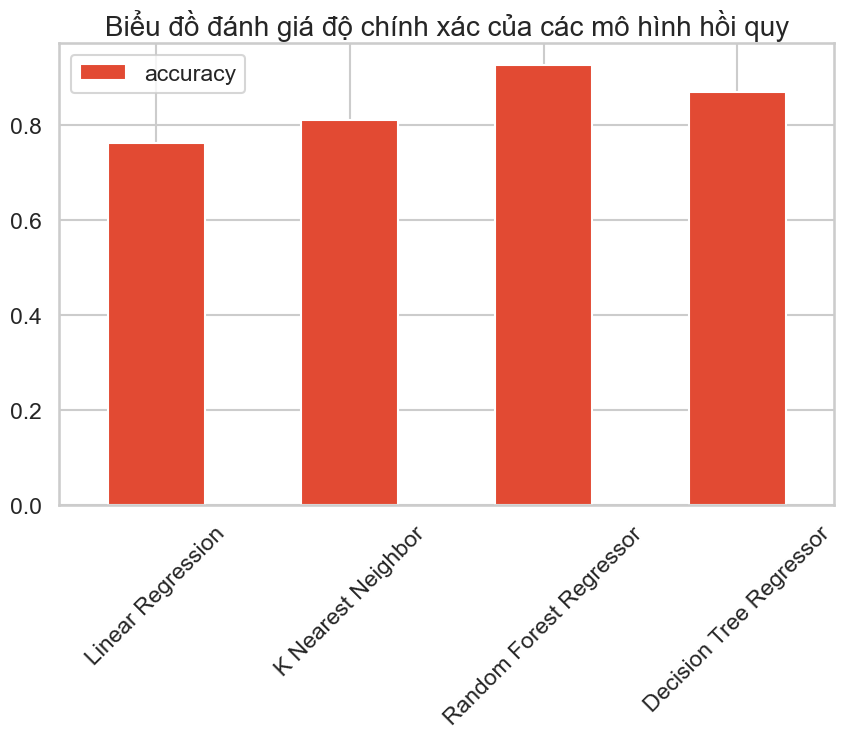

In [34]:
# So sánh độ chính xác của các mô hình khác nhau
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar', figsize=(10,6))
plt.title("Biểu đồ đánh giá độ chính xác của các mô hình hồi quy", fontsize = 20)
plt.xticks(rotation=45);

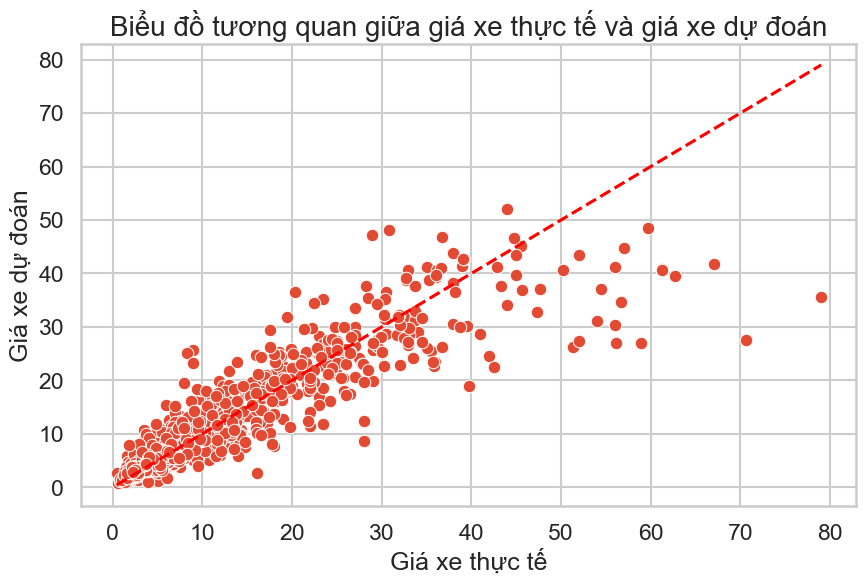

In [35]:
# Chuyển đổi y_test và y_pred thành mảng một chiều để phục vụ visualization
y_test_1d = y_test.values.ravel() if hasattr(y_test, 'values') else y_test
y_pred_1d = y_pred.ravel()

# Tạo một DataFrame để chứa cả giá xe thực tế và giá xe dự đoán bởi mô hình
comparison_df = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})

# Vẽ biểu đồ scatter tương quan giá xe thực tế và giá xe dự đoán bởi mô hình
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='Actual', y='Predicted')
plt.title('Biểu đồ tương quan giữa giá xe thực tế và giá xe dự đoán', fontsize = 20)
plt.xlabel('Giá xe thực tế')
plt.ylabel('Giá xe dự đoán')
plt.plot([comparison_df.min().min(), comparison_df.max().max()], 
         [comparison_df.min().min(), comparison_df.max().max()], 
         color='red', linestyle='--');

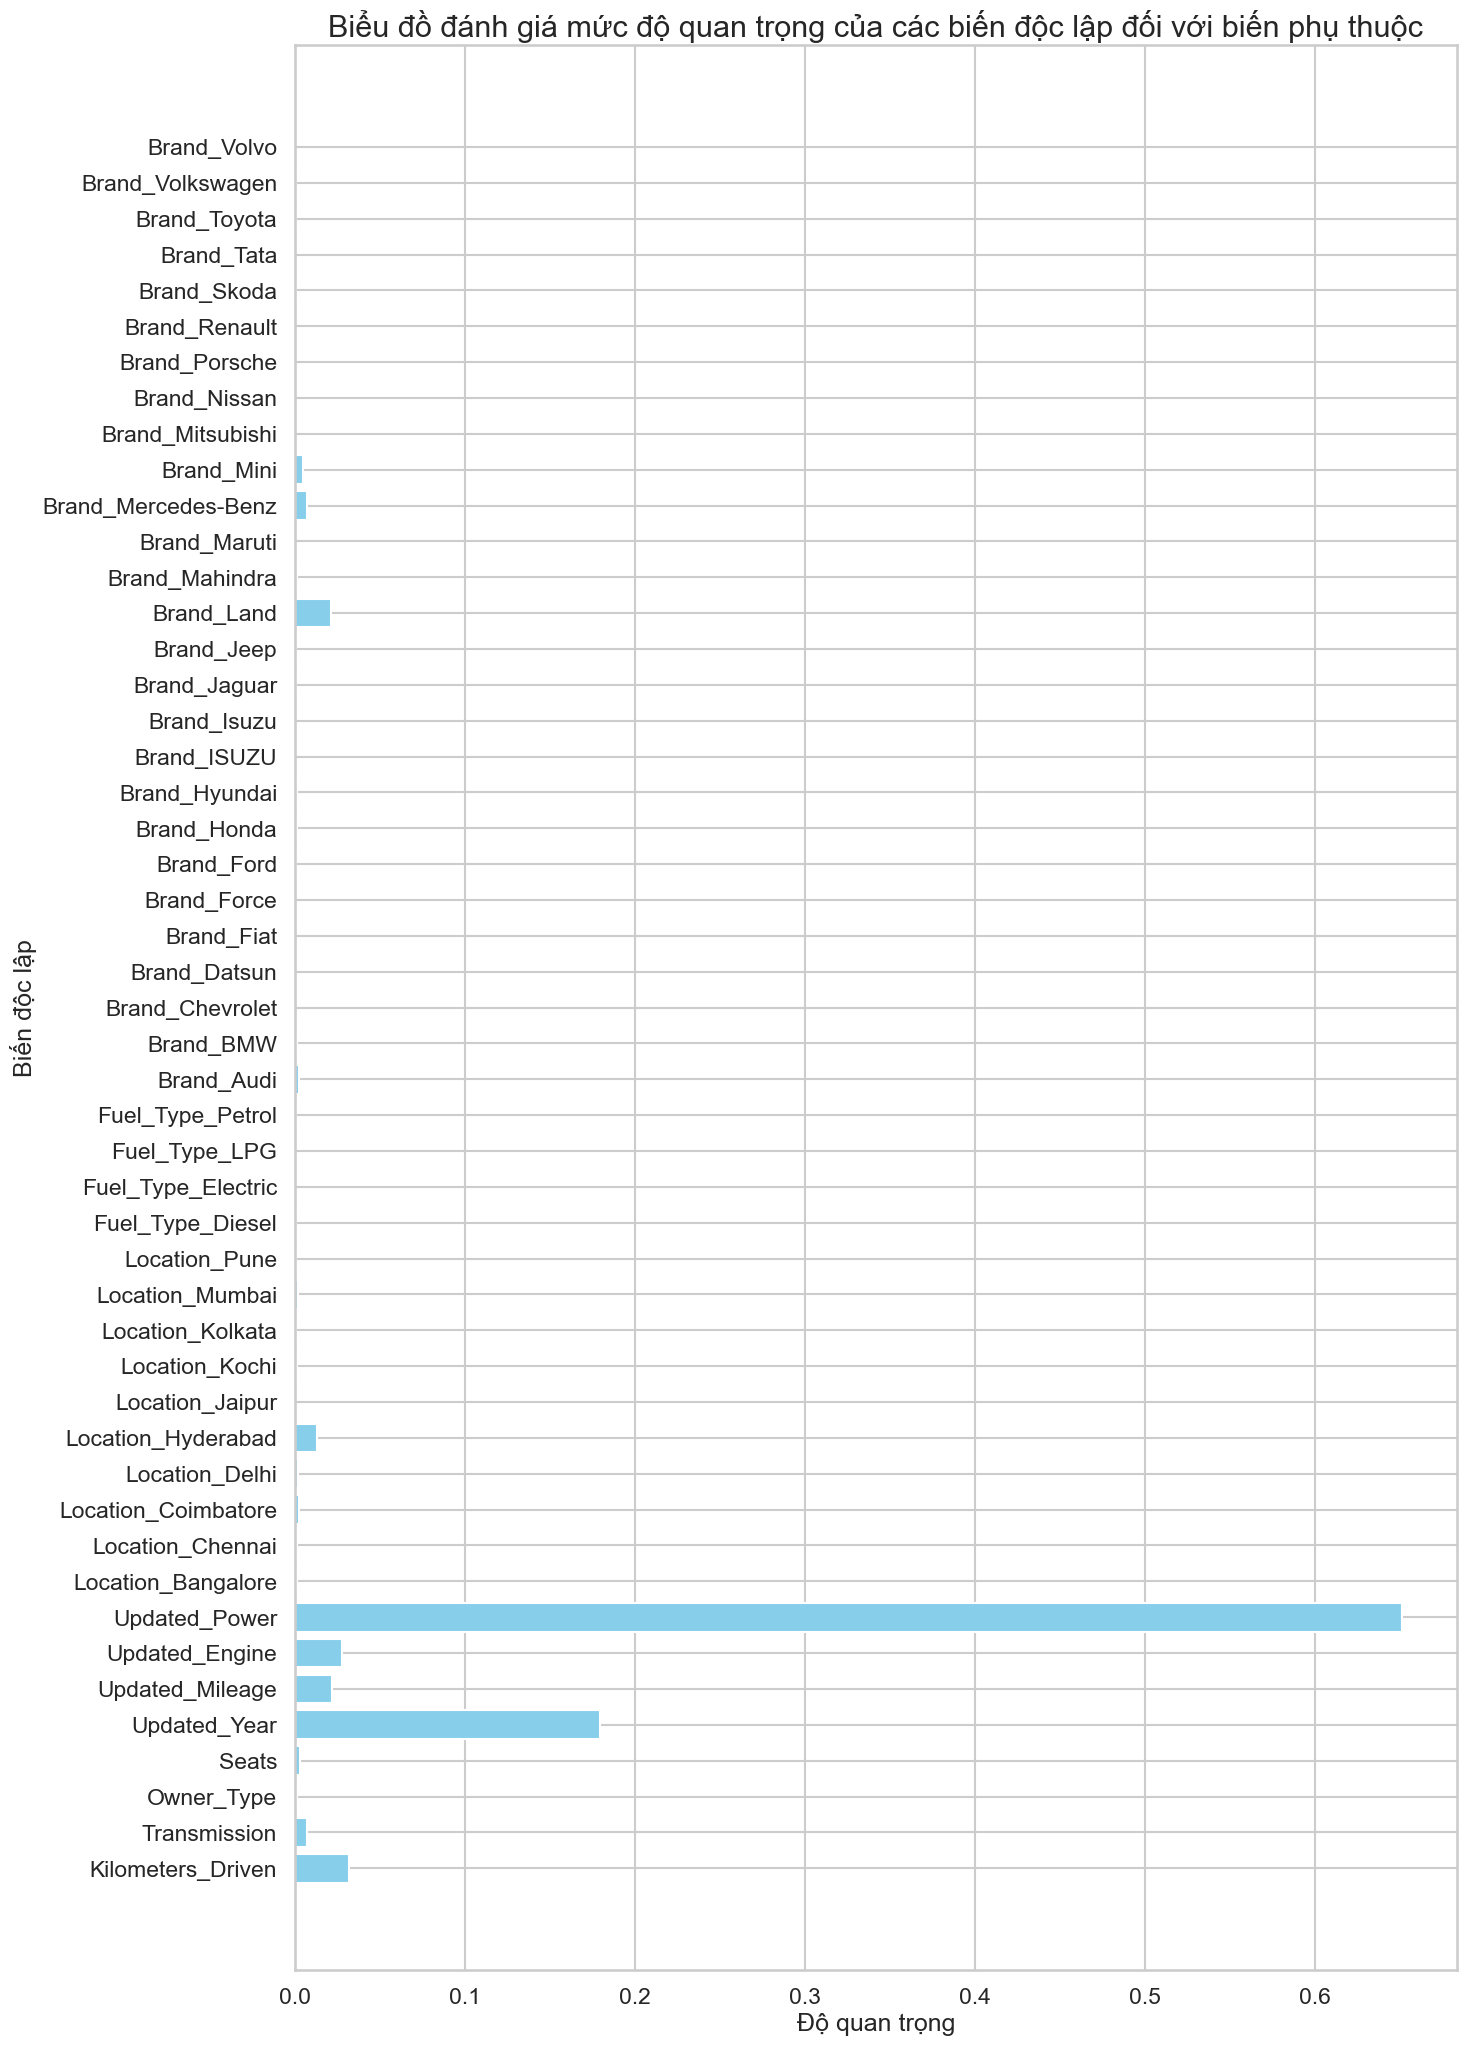

In [36]:
# Huấn luyện lại mô hình Random Forest Regressor để lấy thông tin dữ liệu về mức độ quan trọng của các cột
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.values.ravel())

# Lấy ra dữ liệu về tầm quan trọng của các cột
feature_importances = rf_model.feature_importances_

# Tạo nhãn (label) cho các cột
features = X_train.columns

# Vẽ biểu đồ
plt.figure(figsize=(15, 25))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Độ quan trọng')
plt.ylabel('Biến độc lập')
plt.title('Biểu đồ đánh giá mức độ quan trọng của các biến độc lập đối với biến phụ thuộc', fontsize = 22);